## Import the Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


/Users/quannguyenhn/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/quannguyenhn/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


## 1. Association Rule Mining: Apriori

In [3]:
### 1. Read and display data
grocery_data = pd.read_csv("Market_Basket_Optimisation.csv", header=None)
display(grocery_data[10:30])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
10,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,turkey,burgers,mineral water,eggs,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,spaghetti,champagne,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,mineral water,salmon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,turkey,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,meatballs,milk,honey,french fries,protein bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
### 2. Preprocessing on Data

## transform data to boolean values
cleaned_grocery_data = []
for i in range(1, 7501):
    cleaned_grocery_data.append([str(grocery_data.values[i, j]) for j in range(0, 20)])
cleaned_grocery_data = [[value for value in sublist if (value != 'nan')] for sublist in cleaned_grocery_data]

te = TransactionEncoder()
te_try = te.fit(cleaned_grocery_data).transform(cleaned_grocery_data)
# generate dataframe
grocery_df = pd.DataFrame(te_try, columns=te.columns_)
display(grocery_df)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# display all products
column_names = grocery_df.columns
print(column_names)

Index([' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries',
       ...
       'turkey', 'vegetables mix', 'water spray', 'white wine',
       'whole weat flour', 'whole wheat pasta', 'whole wheat rice', 'yams',
       'yogurt cake', 'zucchini'],
      dtype='object', length=120)


In [6]:
### 3. Running the algorithm to find association rules
## Suppose min_support = 0.05, min_confidence = 0.2, min_lift = 3, min_length = 2
# training model
frequent_itemsets = apriori(grocery_df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087200,(burgers)
1,0.081067,(cake)
2,0.060000,(chicken)
3,0.163867,(chocolate)
4,0.080400,(cookies)
5,0.051067,(cooking oil)
6,0.179733,(eggs)
7,0.079333,(escalope)
8,0.170933,(french fries)
9,0.063200,(frozen smoothie)


In [7]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display the association rules
print("Association Rules:\n", rules)

Association Rules:
        antecedents      consequents  antecedent support  consequent support  \
0  (mineral water)      (chocolate)            0.238267            0.163867   
1      (chocolate)  (mineral water)            0.163867            0.238267   
2  (mineral water)           (eggs)            0.238267            0.179733   
3           (eggs)  (mineral water)            0.179733            0.238267   
4  (mineral water)      (spaghetti)            0.238267            0.174133   
5      (spaghetti)  (mineral water)            0.174133            0.238267   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.052667    0.221041  1.348907  0.013623    1.073398       0.339566  
1  0.052667    0.321400  1.348907  0.013623    1.122506       0.309351  
2  0.050933    0.213766  1.189351  0.008109    1.043286       0.209004  
3  0.050933    0.283383  1.189351  0.008109    1.062957       0.194090  
4  0.059733    0.250699  1.439698  0.018243    1.102184      

## 2. Classification

## Data preprocess

In [9]:
# Load the dataset
data = pd.read_csv("retail_dataset.csv")

# Handle missing values (if any)
# For simplicity, fill missing values with the mean for numerical variables
data.fillna(data.mean(), inplace=True)

# Convert categorical variables using one-hot encoding
categorical_columns = ['Gender', 'StoreLocation', 'PaymentMethod']
data = pd.get_dummies(data, columns=categorical_columns)

# Drop unnecessary columns
data.drop(columns=['CustomerID', 'StoreID', 'PurchaseDate'], inplace=True)

# Normalize numerical variables
numerical_columns = ['Age', 'AnnualIncome', 'ProductPrice', 'FootTraffic', 'InventoryLevel', 
                     'MarketingExpenditure', 'CompetitorPrice']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            20000 non-null  float64
 1   AnnualIncome                   20000 non-null  float64
 2   SpendingScore                  20000 non-null  int64  
 3   ProductCategory                20000 non-null  object 
 4   ProductPrice                   20000 non-null  float64
 5   DiscountApplied                20000 non-null  bool   
 6   DiscountPercent                20000 non-null  int64  
 7   ProductCost                    20000 non-null  float64
 8   Profit                         20000 non-null  float64
 9   FootTraffic                    20000 non-null  float64
 10  InventoryLevel                 20000 non-null  float64
 11  MarketingExpenditure           20000 non-null  float64
 12  CompetitorPrice                20000 non-null 

/var/folders/ws/b7n2t1xj1dbggq2fzsdrhyp40000gn/T/ipykernel_4093/2591020516.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [10]:
print(data.columns)

Index(['Age', 'AnnualIncome', 'SpendingScore', 'ProductCategory',
       'ProductPrice', 'DiscountApplied', 'DiscountPercent', 'ProductCost',
       'Profit', 'FootTraffic', 'InventoryLevel', 'MarketingExpenditure',
       'CompetitorPrice', 'Gender_Female', 'Gender_Male',
       'StoreLocation_Chicago', 'StoreLocation_Dallas',
       'StoreLocation_Houston', 'StoreLocation_Los Angeles',
       'StoreLocation_New York', 'StoreLocation_Philadelphia',
       'StoreLocation_Phoenix', 'StoreLocation_San Antonio',
       'StoreLocation_San Diego', 'StoreLocation_San Jose',
       'PaymentMethod_Cash', 'PaymentMethod_Credit Card',
       'PaymentMethod_Debit Card', 'PaymentMethod_Mobile Payment',
       'PaymentMethod_Online Transfer'],
      dtype='object')


## ZeroR and OneR

In [11]:
# Separate features and target variable
X = data.drop(columns=['ProductCategory'])
y = data['ProductCategory']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification using ZeroR (Most frequent class)
zeroR_clf = DummyClassifier(strategy="most_frequent")
zeroR_clf.fit(X_train, y_train)
zeroR_pred = zeroR_clf.predict(X_test)
zeroR_accuracy = accuracy_score(y_test, zeroR_pred)
print("ZeroR Accuracy:", zeroR_accuracy)

# Classification using OneR
oneR_clf = DecisionTreeClassifier(max_depth=1)
oneR_clf.fit(X_train, y_train)
oneR_pred = oneR_clf.predict(X_test)
oneR_accuracy = accuracy_score(y_test, oneR_pred)
print("OneR Accuracy:", oneR_accuracy)

ZeroR Accuracy: 0.163
OneR Accuracy: 0.16275


## K-Nearest Neighbors

/Users/quannguyenhn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/quannguyenhn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

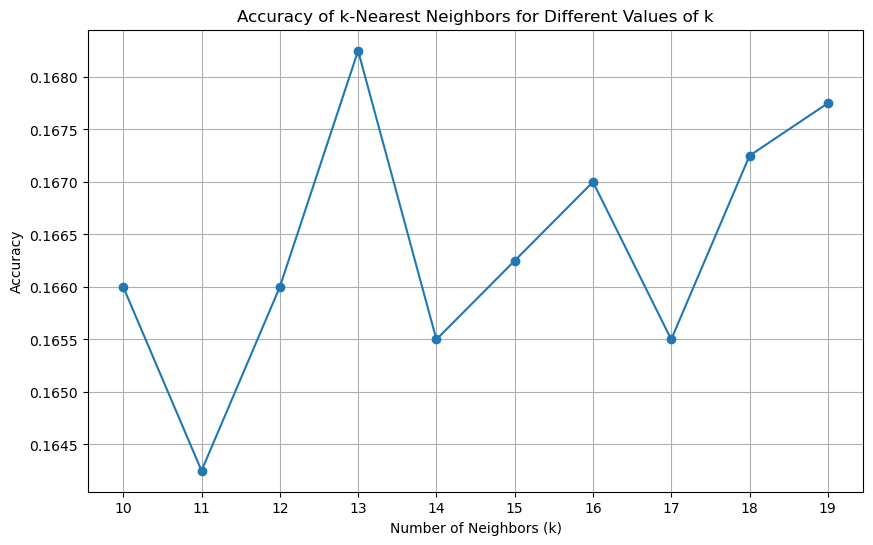

The best k value is: 13 with accuracy: 0.16825


In [12]:
# Classification using k-Nearest Neighbors
# List of k values to try
k_values = list(range(10, 20))

# Dictionary to store accuracy scores for different k values
accuracy_scores = {}

# Loop through different values of k
for k in k_values:
    # Initialize k-NN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn_classifier.fit(X_train, y_train)
    
    # Calculate accuracy on test set
    accuracy = knn_classifier.score(X_test, y_test)
    
    # Store accuracy score for current k value
    accuracy_scores[k] = accuracy

# Visualize the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, list(accuracy_scores.values()), marker='o', linestyle='-')
plt.title('Accuracy of k-Nearest Neighbors for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k value with the highest accuracy
best_k = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best k value is: {best_k} with accuracy: {accuracy_scores[best_k]}")
knn_accuracy = accuracy_scores[best_k]


## Decision Tree

Decision Tree Accuracy: 0.1645


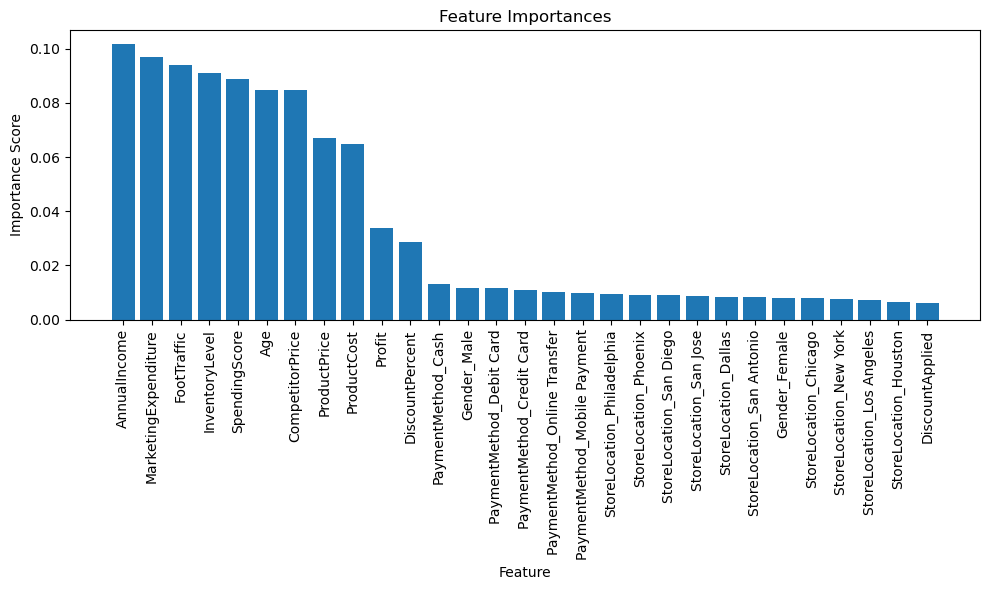

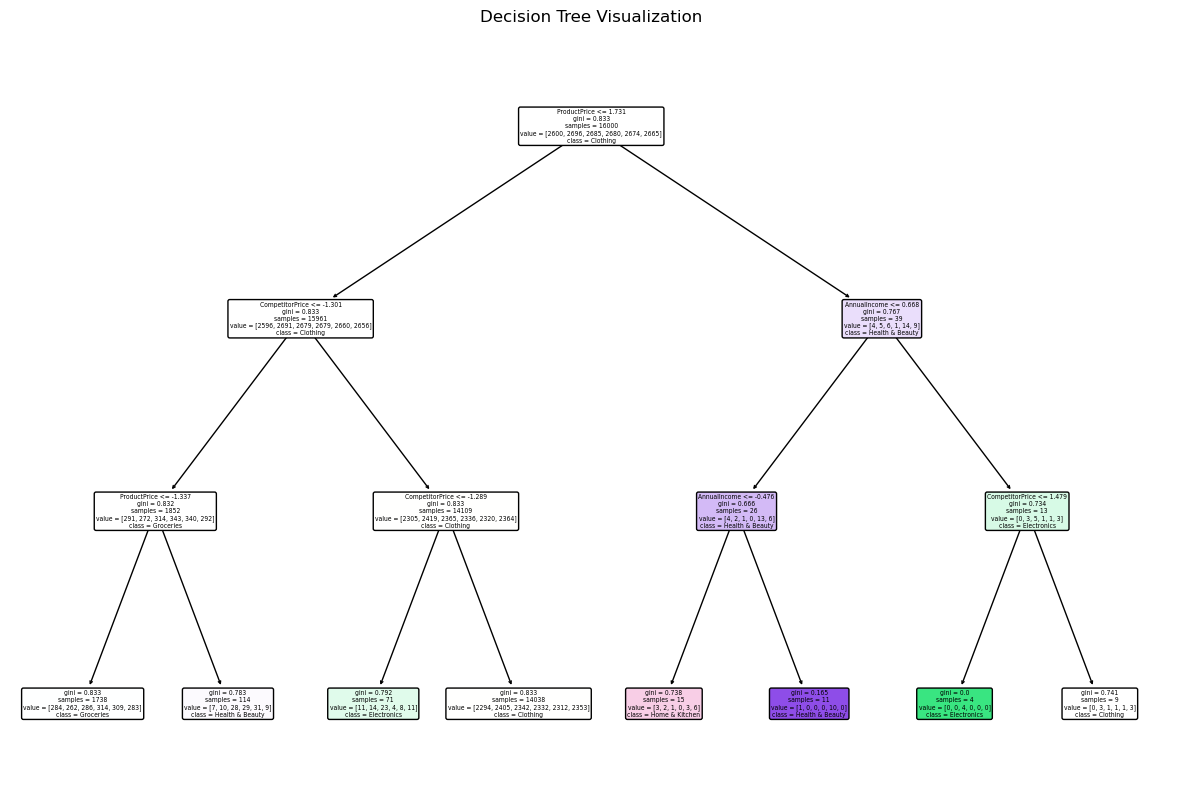

In [13]:
# Initialize Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Calculate accuracy
dt_pred = decision_tree_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Calculate feature importace
importances = decision_tree_classifier.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Get the column names (feature names)
feature_names = X_train.columns
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
print()

# Visualize the decision tree
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
decision_tree_classifier.fit(X_train, y_train)
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_classifier, feature_names=X.columns, class_names=decision_tree_classifier.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

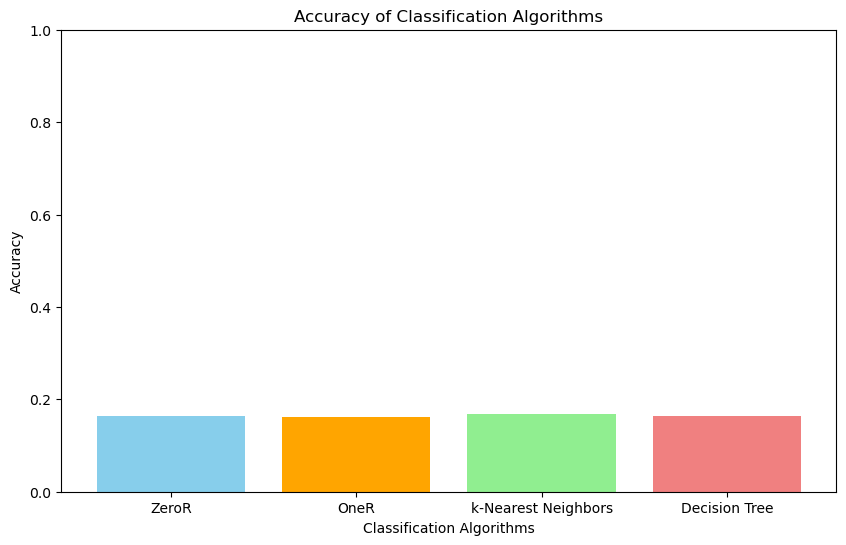

In [14]:
# Accuracy scores of each classifier
accuracy_scores = [zeroR_accuracy, oneR_accuracy, knn_accuracy, dt_accuracy]
classifiers = ['ZeroR', 'OneR', 'k-Nearest Neighbors', 'Decision Tree']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Accuracy of Classification Algorithms')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## 3. Regression

## Preprocess Data

In [15]:
# Load the dataset
data = pd.read_csv("retail_dataset.csv")

# Preprocessing
# Handle missing values (if any)
data.fillna(data.mean(), inplace=True)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Gender', 'ProductCategory', 'StoreLocation', 'PaymentMethod'])

# Drop unnecessary columns
data.drop(columns=['CustomerID', 'PurchaseDate', 'StoreID'], inplace=True)

# Split data into features (X) and target variable (y)
X = data.drop(columns=['SpendingScore'])
# Get feature names
feature_names = X.columns
y = data['SpendingScore']

# Normalize numerical variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/ws/b7n2t1xj1dbggq2fzsdrhyp40000gn/T/ipykernel_4093/3673037568.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


## Decision Tree Regression

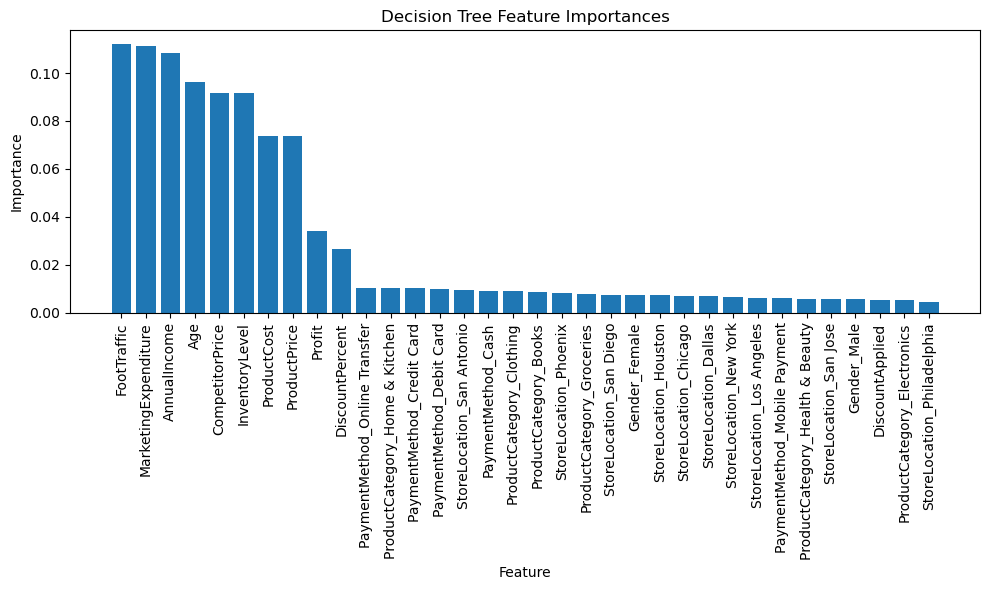

In [16]:
# Decision Tree Regression
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

feature_importances = dt_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

## Linear Regression

In [17]:
# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Get the coefficients (parameters)
coefficients = lr_regressor.coef_

# Convert coefficients to a DataFrame for easier interpretation
coefficients_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Print the coefficients
print(coefficients_df)

                                  Coefficient
Age                             -2.708962e-01
AnnualIncome                    -2.613840e-01
ProductPrice                    -6.254006e+13
DiscountApplied                 -5.439965e-01
DiscountPercent                  5.396221e-02
ProductCost                      5.920199e+13
Profit                           1.320936e+13
FootTraffic                     -1.769104e-01
InventoryLevel                  -1.166450e-01
MarketingExpenditure             1.761823e-01
CompetitorPrice                 -4.085274e-01
Gender_Female                    1.122151e+12
Gender_Male                      1.122151e+12
ProductCategory_Books           -1.730121e+14
ProductCategory_Clothing        -1.741211e+14
ProductCategory_Electronics     -1.738505e+14
ProductCategory_Groceries       -1.741626e+14
ProductCategory_Health & Beauty -1.741211e+14
ProductCategory_Home & Kitchen  -1.736208e+14
StoreLocation_Chicago           -4.298150e+13
StoreLocation_Dallas            -4

## k-Nearest Neighbors

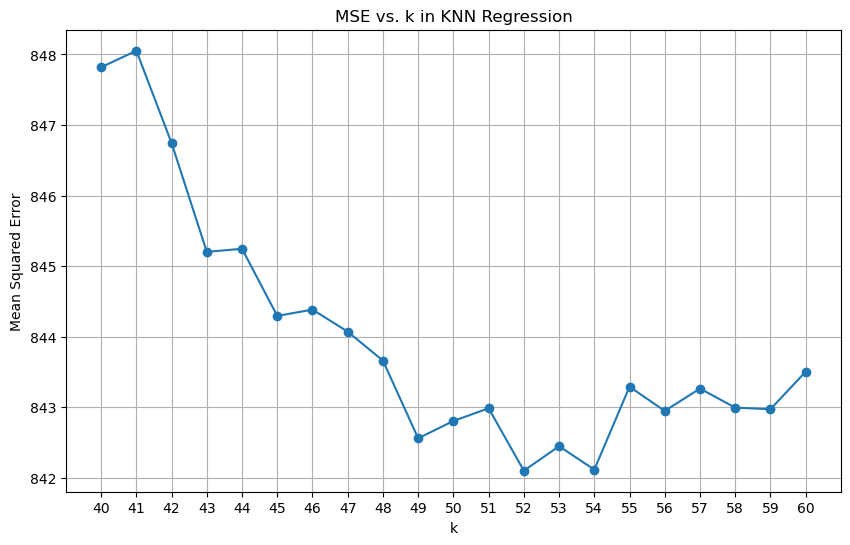

In [18]:
# k-Nearest Neighbors Regression
mse_values = []
k_values = range(40,61)

# Iterate over different values of k
for k in k_values:
    # Create KNN regressor with current k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on training data
    knn_regressor.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = knn_regressor.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Append MSE value and corresponding k value to lists
    mse_values.append(mse)

# Visualize MSE values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.title('MSE vs. k in KNN Regression')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

knn_accuracy = min(mse_values)

## Evaluate test data

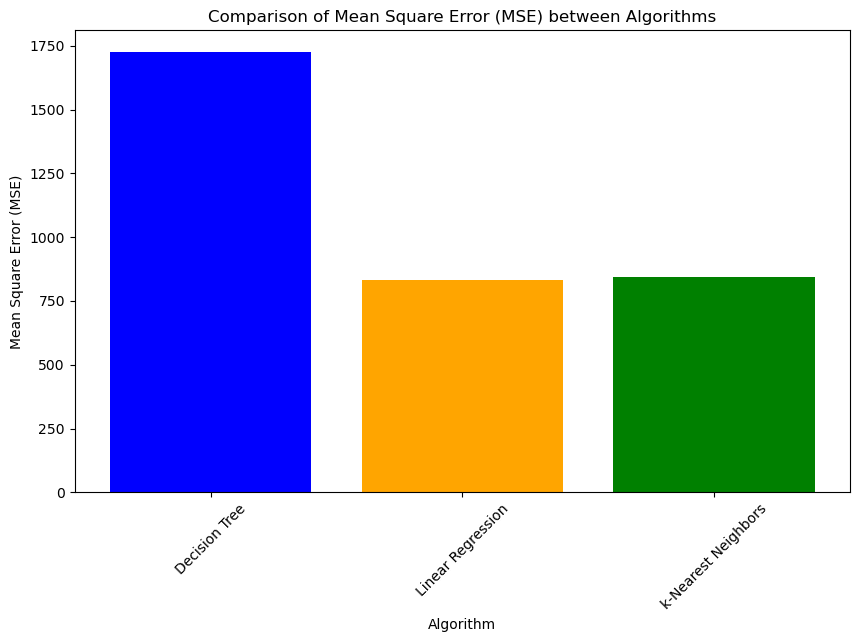

In [20]:
# Decision Tree
dt_y_pred = dt_regressor.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, dt_y_pred)

# Linear Regression
lr_y_pred = lr_regressor.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, lr_y_pred)


mse_values = {
    'Decision Tree': decision_tree_mse,
    'Linear Regression': linear_regression_mse,
    'k-Nearest Neighbors': knn_accuracy
}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Comparison of Mean Square Error (MSE) between Algorithms')
plt.xticks(rotation=45)
plt.show()

## 4. Clustering

## Data Preprocessing

In [22]:
# Load the dataset
data = pd.read_csv("retail_dataset.csv")

# Handle missing values if any
data.dropna(inplace=True)

# Because of the algorithm running time, just pick 1000 rows of data
data = data.iloc[:501,:]

# Display the preprocessed data
print(data.head())

   CustomerID  Age  Gender  AnnualIncome  SpendingScore  ProductCategory  \
0           1   58    Male         60038             41  Health & Beauty   
1           2   57    Male         31577             91  Health & Beauty   
2           3   39  Female        117404             26        Groceries   
3           4   33    Male         87434             94      Electronics   
4           5   18    Male         90225             10  Health & Beauty   

   ProductPrice PurchaseDate  StoreID StoreLocation   PaymentMethod  \
0        147.43   2022-06-11       46      San Jose     Credit Card   
1        402.09   2023-06-05       53   Los Angeles  Mobile Payment   
2        958.45   2020-10-14       95  Philadelphia  Mobile Payment   
3        544.17   2021-08-27       24        Dallas     Credit Card   
4        645.75   2023-06-06        2   San Antonio     Credit Card   

   DiscountApplied  DiscountPercent  ProductCost  Profit  FootTraffic  \
0             True               26       1

## K-means

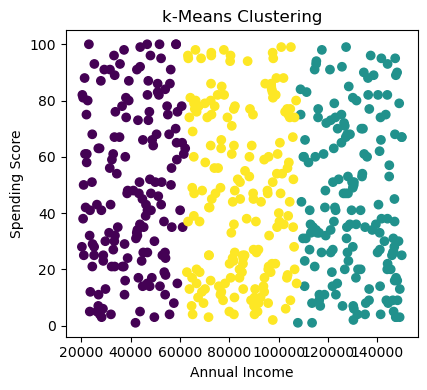

In [23]:
kmeans = KMeans(n_clusters=3)
X = data[['AnnualIncome', 'SpendingScore']]
kmeans_clusters = kmeans.fit_predict(X)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X['AnnualIncome'], X['SpendingScore'], c=kmeans_clusters, cmap='viridis')
plt.title('k-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

## Hierarchical Clustering

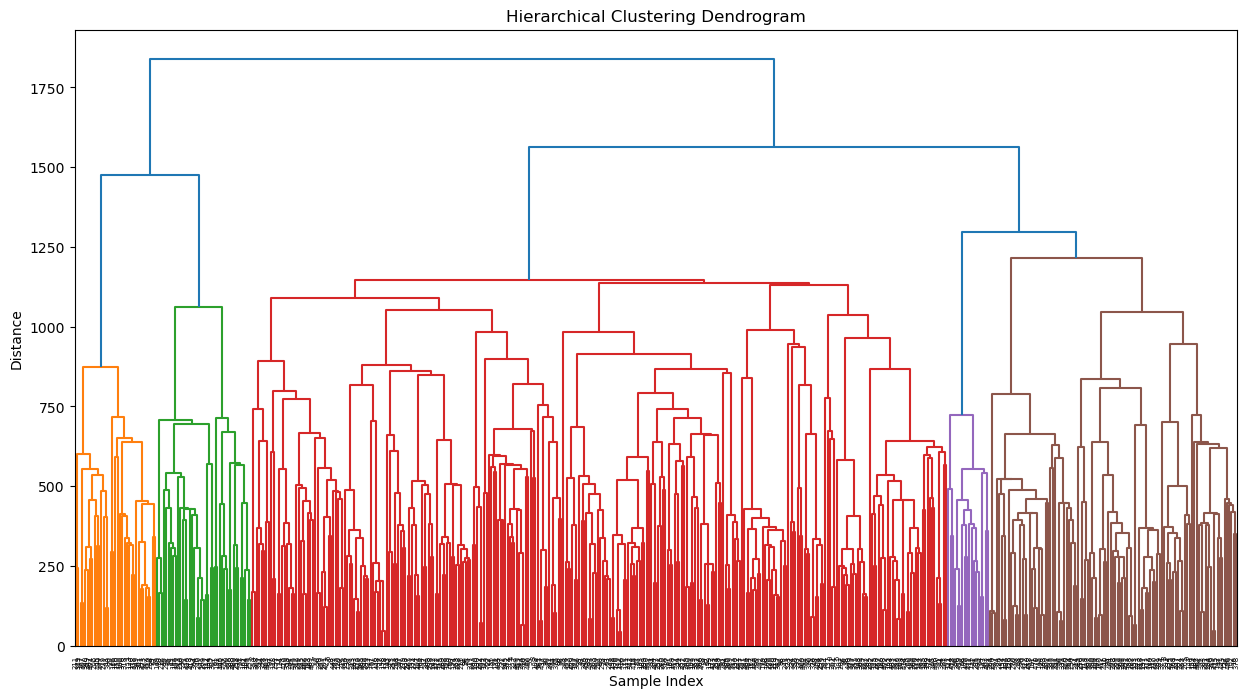

In [24]:
# Select relevant numerical features for clustering
features = ['Age', 'AnnualIncome', 'SpendingScore', 'ProductPrice']

# Perform hierarchical clustering
X = data[features].values
Z = linkage(X, method='single')  # You can choose different linkage methods

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, labels=data.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## DBSCAN

In [25]:
# For DBSCAN
dbscan_clusters = dbscan.fit_predict(X)

# Select features for clustering
X = data[['AnnualIncome', 'SpendingScore']]

# normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.2  # Maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# Count the number of clusters
num_clusters = len(np.unique(labels)) - 1  # Subtract 1 to exclude noise points labeled as -1
print("Number of clusters:", num_clusters)

# Visualize the clusters
plt.figure(figsize=(12, 4))

plt.scatter(X['AnnualIncome'], X['SpendingScore'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

NameError: name 'dbscan' is not defined